In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

In [35]:
fr_an_ddos_df = pd.read_csv('D:/pythonProject/CICIDS2017-datast-analysis/data/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
                            sep=r'\s*,\s*', header=0, engine='python')
fr_an_ps_df = pd.read_csv('D:/pythonProject/CICIDS2017-datast-analysis/data/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
                          sep=r'\s*,\s*', header=0, engine='python')
fr_mr_df = pd.read_csv('D:/pythonProject/CICIDS2017-datast-analysis/data/Friday-WorkingHours-Morning.pcap_ISCX.csv',
                       sep=r'\s*,\s*', header=0, engine='python')
mn_benign_df = pd.read_csv('D:/pythonProject/CICIDS2017-datast-analysis/data/Monday-WorkingHours.pcap_ISCX.csv',
                           sep=r'\s*,\s*', header=0, engine='python')
th_an_df = pd.read_csv('D:/pythonProject/CICIDS2017-datast-analysis/data/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
                       sep=r'\s*,\s*', header=0, engine='python')
th_mr_df = pd.read_csv('D:/pythonProject/CICIDS2017-datast-analysis/data/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
                       sep=r'\s*,\s*', header=0, engine='python')
th_mr_df['Label'] = th_mr_df['Label'].replace(['Web Attack � Brute Force'], 'Web Attack(BruteForce)')
th_mr_df['Label'] = th_mr_df['Label'].replace(['Web Attack � XSS'], 'Web Attack(XSS)')
th_mr_df['Label'] = th_mr_df['Label'].replace(['Web Attack � Sql Injection'], 'Web Attack(SqlInjection)')
tu_df = pd.read_csv('D:/pythonProject/CICIDS2017-datast-analysis/data/Tuesday-WorkingHours.pcap_ISCX.csv',
                    sep=r'\s*,\s*', header=0, engine='python')
we_df = pd.read_csv('D:/pythonProject/CICIDS2017-datast-analysis/data/Wednesday-workingHours.pcap_ISCX.csv',
                    sep=r'\s*,\s*', header=0, engine='python')

dfs_names = {'Friday-WorkingHours-Afternoon-DDos': fr_an_ddos_df,
                 'Friday-WorkingHours-Afternoon-PortScan': fr_an_ps_df,
                 'Friday-WorkingHours-Morning': fr_mr_df,
                 'Monday-WorkingHours': mn_benign_df,
                 'Thursday-WorkingHours-Afternoon-Infilteration': th_an_df,
                 'Thursday-WorkingHours-Morning-WebAttacks': th_mr_df,
                 'Tuesday-WorkingHours': tu_df,
                 'Wednesday-workingHours': we_df}

In [36]:
# deleting columns that contain a single value
for name, df in dfs_names.items():
    # print(name)
    # counts = df.loc[:, : 'Idle Min'].nunique()
    # to_del = [i for i, v in enumerate(counts) if v == 1]
    # #print(df.columns[to_del])
    # print(to_del)
    # df.drop(df.columns[to_del], axis=1, inplace=True)
    df.dropna(axis=0, inplace=True)


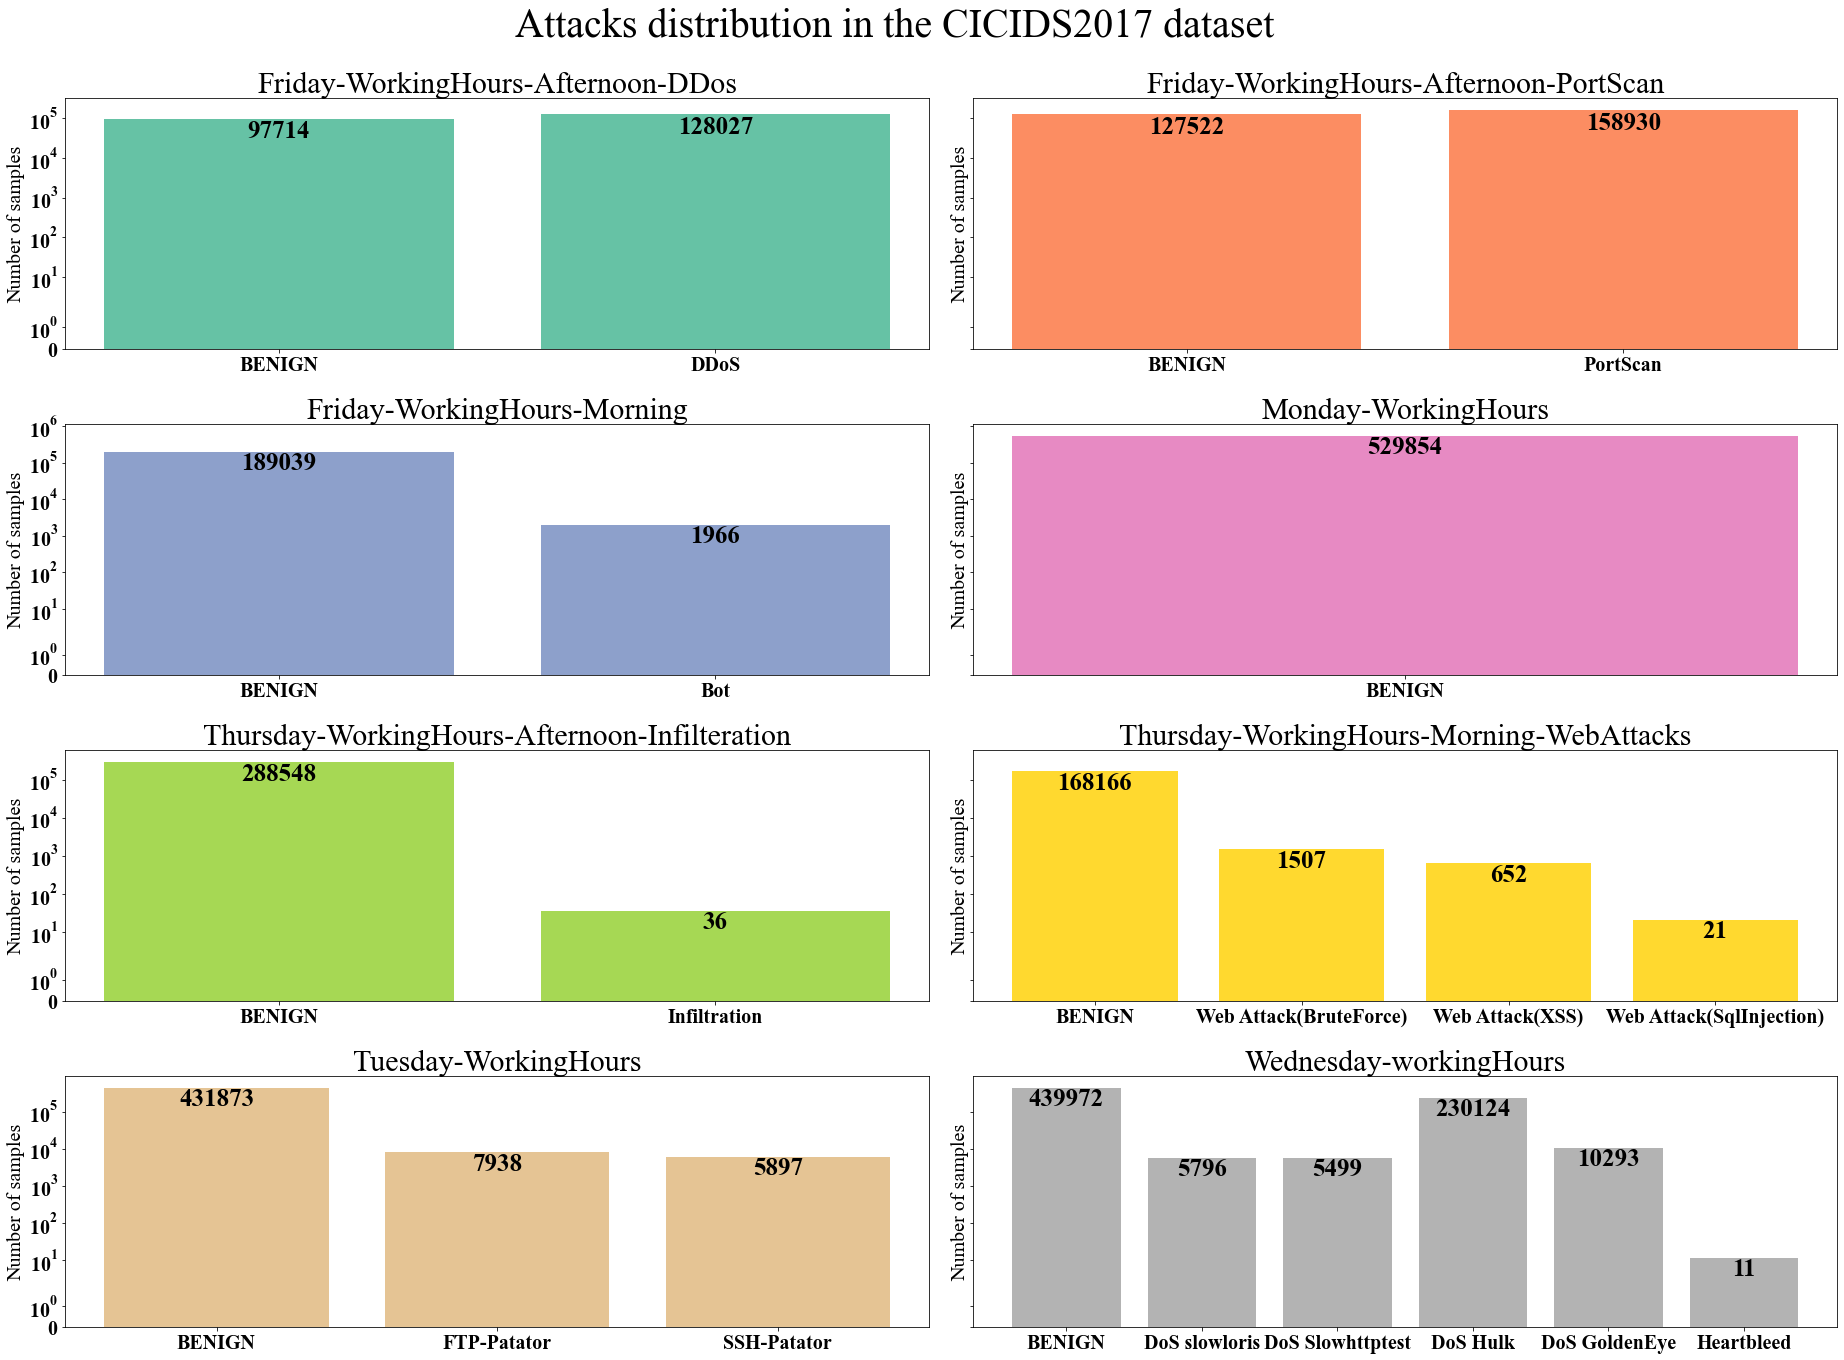

In [37]:
def plot_all_dfs_file_types():

    font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 20}
    plt.rc('font', **font)

    fig, ax = plt.subplots(4, 2, sharey='row', figsize=(27, 20))
    ax = ax.flatten()

    cmap = plt.get_cmap('Set2')
    colors = iter(cmap(np.arange(cmap.N)))

    for idx, (name, df) in enumerate(dfs_names.items()):
        x, y = get_df_attack_info(df)
        ax[idx].bar(x, y, color=next(colors))
        ax[idx].set_title(name, fontsize=30)
        ax[idx].set(ylabel='Number of samples')
        ax[idx].set_yscale('symlog')

        rects = ax[idx].patches

        for rect, label in zip(rects, y):
            height = rect.get_height()
            ax[idx].text(rect.get_x() + rect.get_width() / 2, height / 4, label,
                    ha='center', va='bottom', fontsize=25)

    fig.tight_layout(rect=[0.03, 0.03, 1, 0.95])
    plt.suptitle('Attacks distribution in the CICIDS2017 dataset ', fontsize=40)

    #plt.show()


def get_df_attack_info(dataframe):
    x = dataframe['Label'].unique()
    y = list()
    for label in x:
        y.append(dataframe.loc[dataframe['Label'] == label]['Label'].count())
    return x, y


plot_all_dfs_file_types()

In [38]:

def print_file_types(dataframe, df_name):
    print(df_name)
    for label in dataframe['Label'].unique():
        print('{} : {} samples'.format(label,dataframe.loc[dataframe['Label'] == label]['Label'].count()))


print_file_types(fr_an_ddos_df,'Friday-WorkingHours-Afternoon-DDos')
print_file_types(fr_an_ps_df,'Friday-WorkingHours-Afternoon-PortScan')
print_file_types(fr_mr_df,'Friday-WorkingHours-Morning')
print_file_types(mn_benign_df,'Monday-WorkingHours')
print_file_types(th_an_df,'Thursday-WorkingHours-Afternoon-Infilteration')
print_file_types(th_mr_df,'Thursday-WorkingHours-Morning-WebAttacks')
print_file_types(tu_df,'Tuesday-WorkingHours')
print_file_types(we_df,'Wednesday-workingHours')

Friday-WorkingHours-Afternoon-DDos
BENIGN : 97714 samples
DDoS : 128027 samples
Friday-WorkingHours-Afternoon-PortScan
BENIGN : 127522 samples
PortScan : 158930 samples
Friday-WorkingHours-Morning
BENIGN : 189039 samples
Bot : 1966 samples
Monday-WorkingHours
BENIGN : 529854 samples
Thursday-WorkingHours-Afternoon-Infilteration
BENIGN : 288548 samples
Infiltration : 36 samples
Thursday-WorkingHours-Morning-WebAttacks
BENIGN : 168166 samples
Web Attack(BruteForce) : 1507 samples
Web Attack(XSS) : 652 samples
Web Attack(SqlInjection) : 21 samples
Tuesday-WorkingHours
BENIGN : 431873 samples
FTP-Patator : 7938 samples
SSH-Patator : 5897 samples
Wednesday-workingHours
BENIGN : 439972 samples
DoS slowloris : 5796 samples
DoS Slowhttptest : 5499 samples
DoS Hulk : 230124 samples
DoS GoldenEye : 10293 samples
Heartbleed : 11 samples


In [39]:
malicious_sample_number = 3000
benign_sample_number = 20000

ddos_df = fr_an_ddos_df.loc[fr_an_ddos_df['Label'] == 'DDoS'].sample(n=malicious_sample_number)
portscan_df = fr_an_ps_df.loc[fr_an_ps_df['Label'] == 'PortScan'].sample(n=malicious_sample_number)
ftp_df = tu_df.loc[tu_df['Label'] == 'FTP-Patator'].sample(n=malicious_sample_number)
ssh_df = tu_df.loc[tu_df['Label'] == 'SSH-Patator'].sample(n=malicious_sample_number)
slowloris_df = we_df.loc[we_df['Label'] == 'DoS slowloris'].sample(n=malicious_sample_number)
slowhttptest_df = we_df.loc[we_df['Label'] == 'DoS Slowhttptest'].sample(n=malicious_sample_number)
hulk_df = we_df.loc[we_df['Label'] == 'DoS Hulk'].sample(n=malicious_sample_number)
goldenEye_df = we_df.loc[we_df['Label'] == 'DoS GoldenEye'].sample(n=malicious_sample_number)
benign_df = mn_benign_df.sample(n=benign_sample_number)

res_dfs = [fr_mr_df.loc[fr_mr_df['Label'] == 'Bot'], th_mr_df.loc[th_mr_df['Label'] == 'Web Attack(BruteForce)'],
           th_mr_df.loc[th_mr_df['Label'] == 'Web Attack(XSS)'],
           th_mr_df.loc[th_mr_df['Label'] == 'Web Attack(SqlInjection)'], ddos_df, portscan_df, ftp_df, ssh_df,
           slowloris_df, slowhttptest_df, hulk_df, goldenEye_df, benign_df]

traffic_df = pd.concat(res_dfs, ignore_index=True, axis=0)

traffic_df['Label'] = traffic_df['Label'].replace(['Web Attack(BruteForce)'], 'Web Attack')
traffic_df['Label'] = traffic_df['Label'].replace(['Web Attack(XSS)'], 'Web Attack')
traffic_df['Label'] = traffic_df['Label'].replace(['Web Attack(SqlInjection)'], 'Web Attack')


Traffic df
Bot : 1966 samples
Web Attack : 2180 samples
DDoS : 3000 samples
PortScan : 3000 samples
FTP-Patator : 3000 samples
SSH-Patator : 3000 samples
DoS slowloris : 3000 samples
DoS Slowhttptest : 3000 samples
DoS Hulk : 3000 samples
DoS GoldenEye : 3000 samples
BENIGN : 20000 samples


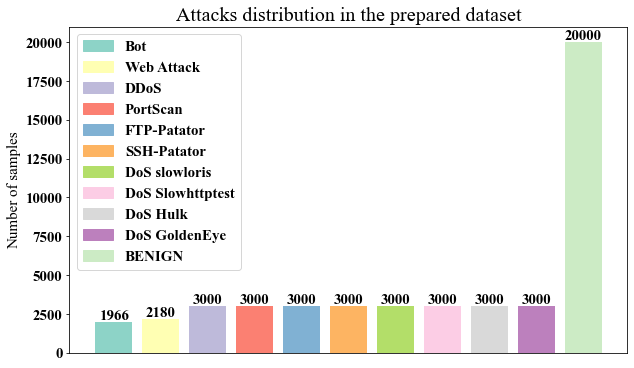

In [40]:
print_file_types(traffic_df, "Traffic df")


def plot_traffic_df_file_types():
    font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 15}
    plt.rc('font', **font)

    fig, ax = plt.subplots(figsize=(10, 6))

    cmap = plt.get_cmap('Set3')
    colors = cmap(np.arange(cmap.N))

    x, y = get_df_attack_info(traffic_df)
    ax.bar(x, y, color=colors)
    ax.get_xaxis().set_visible(False)
    ax.set(ylabel='Number of samples')
    ax.set_title('Attacks distribution in the prepared dataset', fontsize=20)

    color_patches = list()
    iter_color = iter(colors)
    for label in x:
        color_patches.append(mpatches.Patch(color=next(iter_color), label=label))
    ax.legend(handles=color_patches)

    rects = ax.patches
    for rect, label in zip(rects, y):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height, label,
                ha='center', va='bottom')

    plt.show()


plot_traffic_df_file_types()

In [41]:

traffic_df.to_csv(r'D:/pythonProject/CICIDS2017-datast-analysis/data/Whole-Traffic.pcap_ISCX.csv')


